In [2]:
import pandas as pd

#extract dataset
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#preprocessing data
df = df.rename(columns={'Gender': 'gender', 'Age':'age', 
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

#convert catogorical into number
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
, kmeans_plusplus
#import k-means clustering

from sklearn.cluster import KMeans

#drop customer_id & gender
X = df.drop(['CustomerID', 'gender'], axis=1)

#Inisiate list for intertia clustering
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

print(len(clusters))
print(clusters)
print(df.shape)

10
[308812.78, 212840.1698209719, 143342.751571706, 104366.15145556197, 75378.76464074483, 58300.44332159069, 51155.246002852975, 44344.280380430384, 40602.40694083694, 37125.747242572244]
(200, 5)


Text(0, 0.5, 'Inertia')

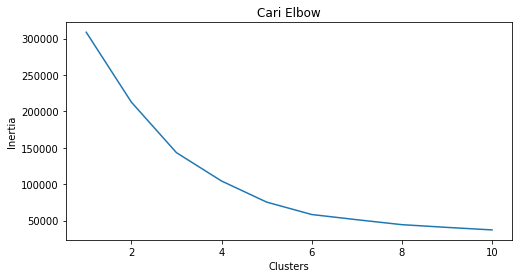

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

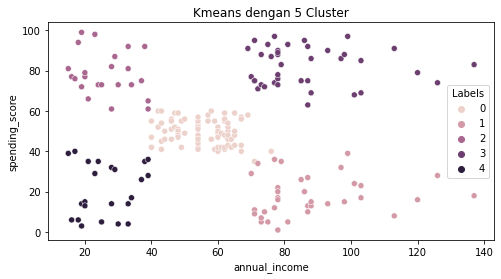

In [16]:
#build object for kmeans
km5 = KMeans(n_clusters=5).fit(X)

#menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels']),
palette=sns.color_palette('hls', 5)
plt.title('Kmeans dengan 5 Cluster')
plt.show()

